In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "netflix_titles.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(None,
   show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  S

#### 🔍 Genres Dominating TV Shows

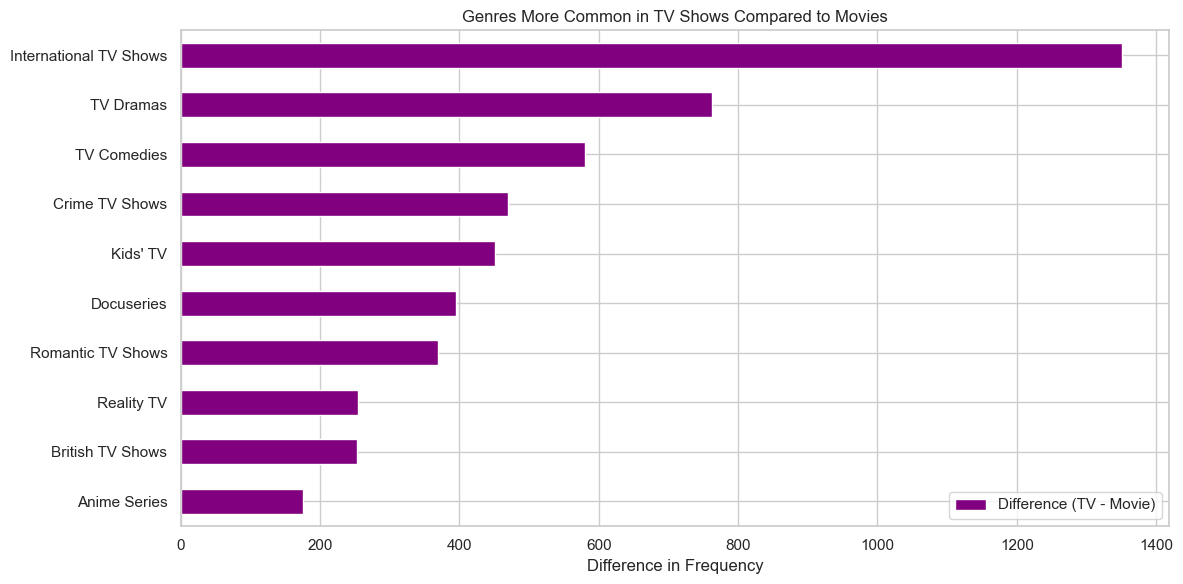

,TV Show,Movie,Difference (TV - Movie)
International TV Shows,1351.0,0.0,1351.0
TV Dramas,763.0,0.0,763.0
TV Comedies,581.0,0.0,581.0
Crime TV Shows,470.0,0.0,470.0
Kids' TV,451.0,0.0,451.0
Docuseries,395.0,0.0,395.0
Romantic TV Shows,370.0,0.0,370.0
Reality TV,255.0,0.0,255.0
British TV Shows,253.0,0.0,253.0
Anime Series,176.0,0.0,176.0


In [5]:
# Separate dataframes
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Extract genre lists
tv_genres = sum(tv_shows['listed_in'].dropna().apply(lambda x: x.split(', ')), [])
movie_genres = sum(movies['listed_in'].dropna().apply(lambda x: x.split(', ')), [])

# Count frequencies
tv_genre_counts = pd.Series(tv_genres).value_counts()
movie_genre_counts = pd.Series(movie_genres).value_counts()

# Combine into one DataFrame
genre_comparison = pd.DataFrame({
    'TV Show': tv_genre_counts,
    'Movie': movie_genre_counts
}).fillna(0)

# Add column for difference
genre_comparison['Difference (TV - Movie)'] = genre_comparison['TV Show'] - genre_comparison['Movie']

# Sort by difference
genre_comparison_sorted = genre_comparison.sort_values(by='Difference (TV - Movie)', ascending=False)

# Plotting top 10 genres more common in TV Shows
genre_comparison_sorted.head(10).plot(kind='barh', y='Difference (TV - Movie)', color='purple', figsize=(12, 6))
plt.title("Genres More Common in TV Shows Compared to Movies")
plt.xlabel("Difference in Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

genre_comparison_sorted.head(10)


#### 🌍 How has the diversity of countries represented on Netflix changed over the years?

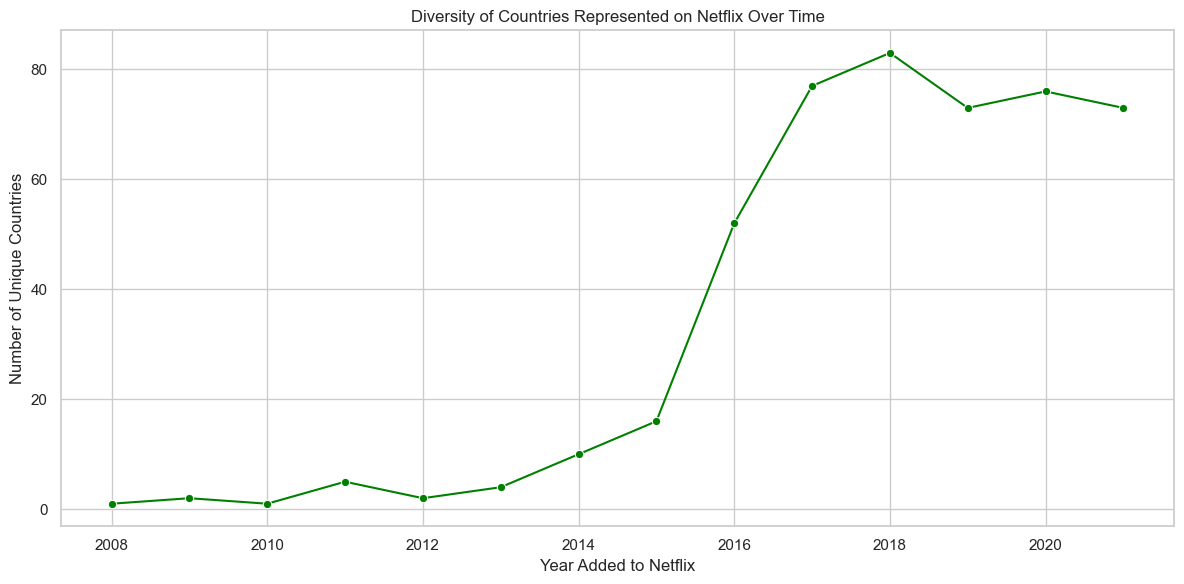

year_added
2012.0     2
2013.0     4
2014.0    10
2015.0    16
2016.0    52
2017.0    77
2018.0    83
2019.0    73
2020.0    76
2021.0    73
Name: country, dtype: int64

In [16]:
# Re-run with proper handling for inconsistent datetime strings using 'mixed' format
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Split and explode countries
df_countries = df.dropna(subset=['country', 'year_added']).copy()
df_countries['country'] = df_countries['country'].str.split(', ')
df_countries = df_countries.explode('country')

# Group by year and count unique countries
country_diversity = df_countries.groupby('year_added')['country'].nunique()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=country_diversity.index, y=country_diversity.values, marker="o", color="green")
plt.title("Diversity of Countries Represented on Netflix Over Time")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Unique Countries")
plt.grid(True)
plt.tight_layout()
plt.show()

country_diversity.tail(10)


#### What’s the average duration trend of Netflix movies over the years?

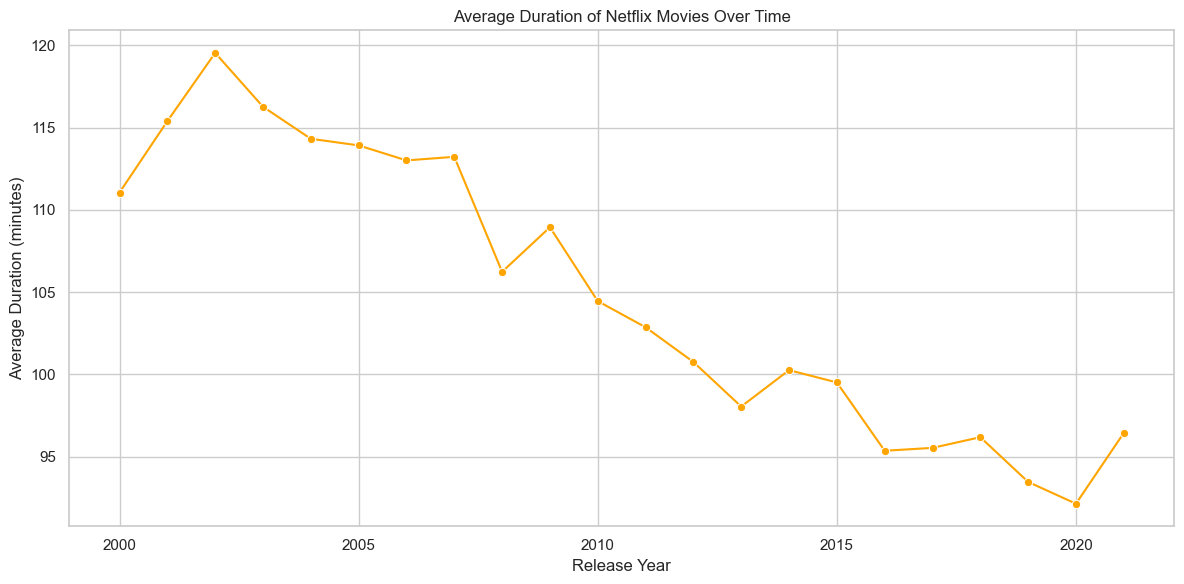

release_year
2012    100.757225
2013     98.048889
2014    100.261364
2015     99.513854
2016     95.360182
2017     95.535248
2018     96.185137
2019     93.466035
2020     92.141199
2021     96.444043
Name: duration_minutes, dtype: float64

In [7]:
# Filter for movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (e.g., from "90 min" → 90)
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

# Group by release year and compute average duration
avg_duration_by_year = movies_df.groupby('release_year')['duration_minutes'].mean().dropna()

# Filter to years after 2000 for relevance
avg_duration_by_year = avg_duration_by_year[avg_duration_by_year.index >= 2000]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_duration_by_year.index, y=avg_duration_by_year.values, marker='o', color='orange')
plt.title("Average Duration of Netflix Movies Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

avg_duration_by_year.tail(10)


#### Which actors appear most frequently in Netflix content, and what types of shows or movies are they in?

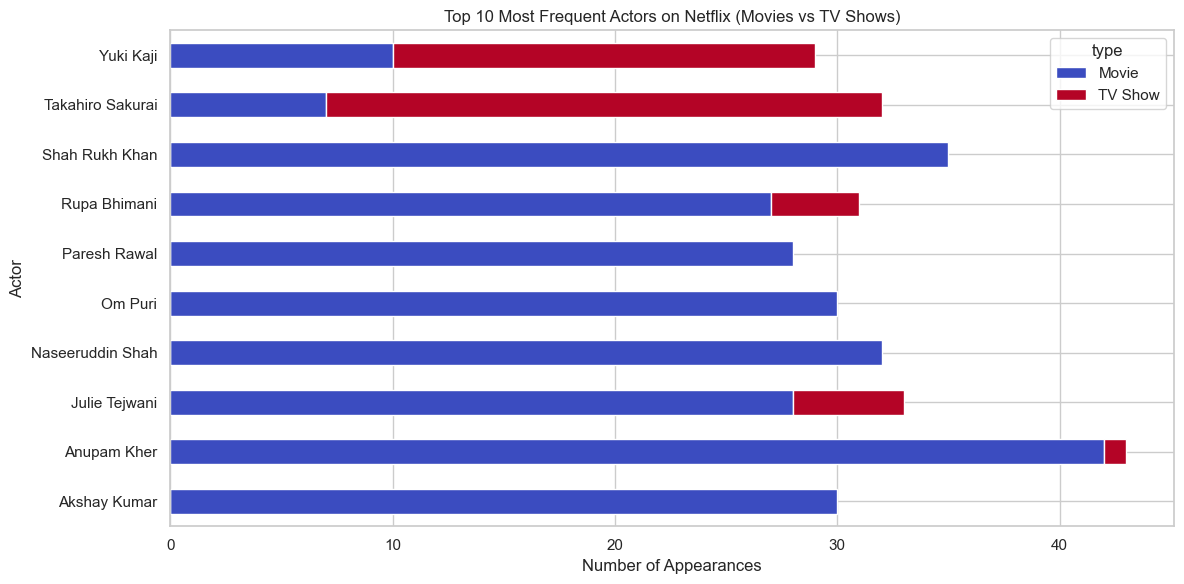

type,Movie,TV Show
cast,,
Akshay Kumar,30,0
Anupam Kher,42,1
Julie Tejwani,28,5
Naseeruddin Shah,32,0
Om Puri,30,0
Paresh Rawal,28,0
Rupa Bhimani,27,4
Shah Rukh Khan,35,0
Takahiro Sakurai,7,25


In [8]:
# Drop null cast and explode actor names
actor_df = df.dropna(subset=['cast']).copy()
actor_df['cast'] = actor_df['cast'].str.split(', ')
actor_df = actor_df.explode('cast')

# Count appearances per actor
top_actors = actor_df['cast'].value_counts().head(10)

# Create a pivot of actor vs content type
actor_type_counts = actor_df[actor_df['cast'].isin(top_actors.index)].groupby(['cast', 'type']).size().unstack(fill_value=0)

# Plot
actor_type_counts.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Top 10 Most Frequent Actors on Netflix (Movies vs TV Shows)")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()

actor_type_counts


#### What’s the distribution of number of seasons in Netflix TV shows, and is it changing over time?

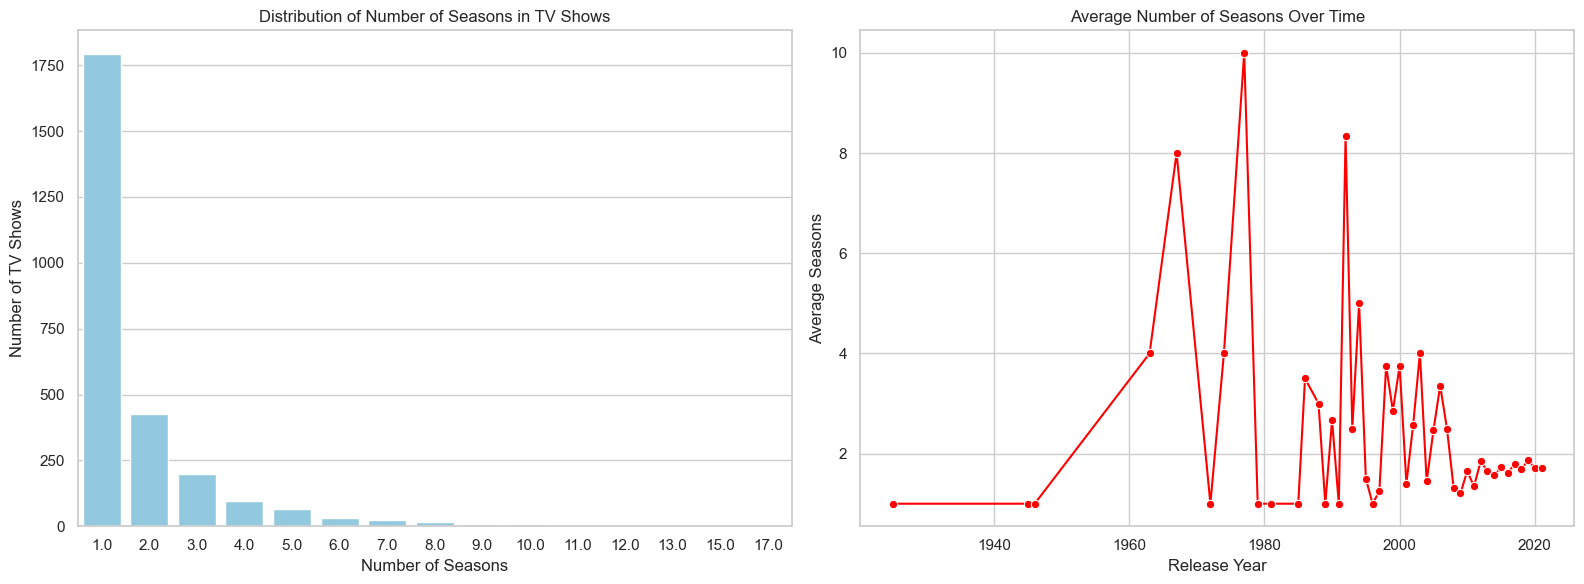

(seasons
 1.0     1793
 2.0      425
 3.0      199
 4.0       95
 5.0       65
 6.0       33
 7.0       23
 8.0       17
 9.0        9
 10.0       7
 Name: count, dtype: int64,
 release_year
 2012    1.843750
 2013    1.650794
 2014    1.568182
 2015    1.728395
 2016    1.618852
 2017    1.788679
 2018    1.684211
 2019    1.869018
 2020    1.711009
 2021    1.717460
 Name: seasons, dtype: float64)

In [9]:
# Filter for TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

# Extract number of seasons
tv_df['seasons'] = tv_df['duration'].str.extract(r'(\d+)').astype(float)

# Distribution of season counts
season_distribution = tv_df['seasons'].value_counts().sort_index()

# Average number of seasons by release year
avg_seasons_by_year = tv_df.groupby('release_year')['seasons'].mean().dropna()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Season count distribution
sns.barplot(x=season_distribution.index, y=season_distribution.values, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Number of Seasons in TV Shows")
axes[0].set_xlabel("Number of Seasons")
axes[0].set_ylabel("Number of TV Shows")

# Average seasons per year
sns.lineplot(x=avg_seasons_by_year.index, y=avg_seasons_by_year.values, ax=axes[1], marker='o', color='red')
axes[1].set_title("Average Number of Seasons Over Time")
axes[1].set_xlabel("Release Year")
axes[1].set_ylabel("Average Seasons")

plt.tight_layout()
plt.show()

season_distribution.head(10), avg_seasons_by_year.tail(10)


#### How do Netflix’s TV and Movie ratings compare? Which types of content target kids vs adults?

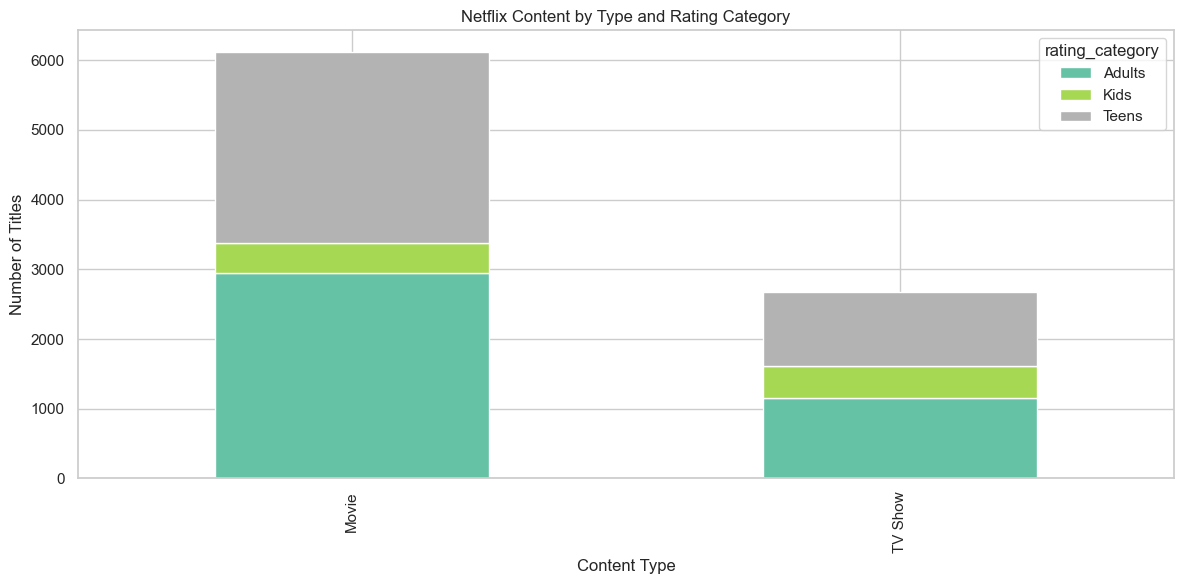

rating_category,Adults,Kids,Teens
type,,,
Movie,2940,437,2744
TV Show,1152,465,1056


In [10]:
# Group rating counts by content type
rating_counts = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Define age category map
rating_category_map = {
    'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'G': 'Kids', 'TV-G': 'Kids',
    'PG': 'Teens', 'TV-PG': 'Teens', 'PG-13': 'Teens',
    'R': 'Adults', 'TV-MA': 'Adults', 'NR': 'Adults', 'UR': 'Adults',
    'NC-17': 'Adults', 'TV-14': 'Teens'
}

# Apply categorization
df['rating_category'] = df['rating'].map(rating_category_map)
rating_cat_summary = df.groupby(['type', 'rating_category']).size().unstack(fill_value=0)

# Plot
rating_cat_summary.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Netflix Content by Type and Rating Category")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

rating_cat_summary


#### 🌍 Insight from Question 7: Top Genres by Country

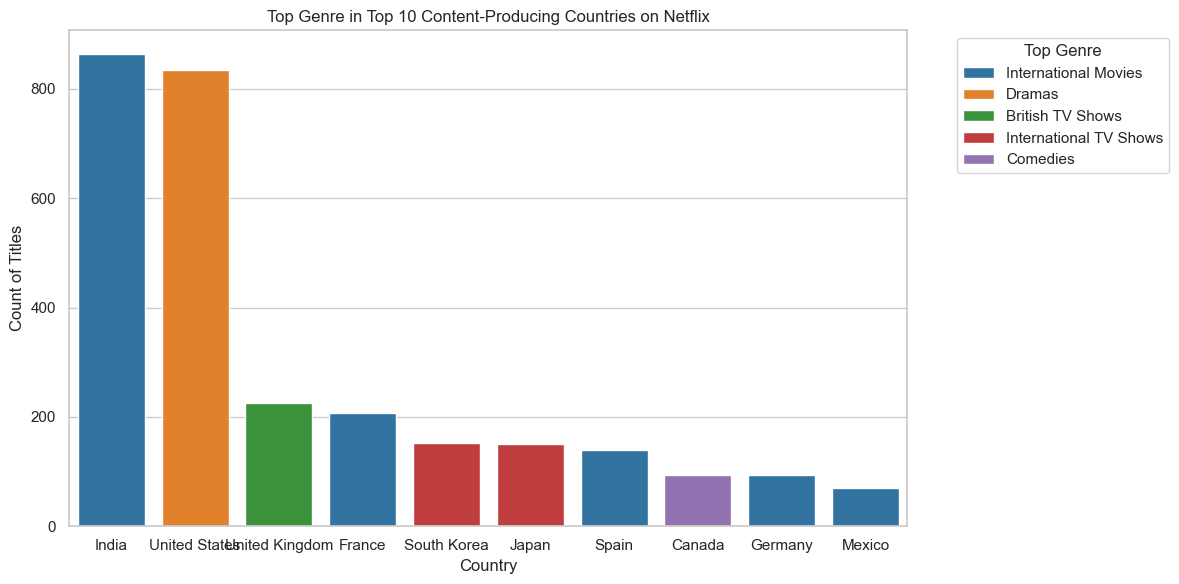

,country,listed_in,count
526,India,International Movies,864
1351,United States,Dramas,835
1300,United Kingdom,British TV Shows,225
391,France,International Movies,207
1109,South Korea,International TV Shows,152
663,Japan,International TV Shows,151
1147,Spain,International Movies,140
182,Canada,Comedies,94
429,Germany,International Movies,94
782,Mexico,International Movies,70


In [11]:
# Drop nulls in country and genre columns
df_country_genre = df.dropna(subset=['country', 'listed_in']).copy()

# Split and explode both country and genre
df_country_genre['country'] = df_country_genre['country'].str.split(', ')
df_country_genre['listed_in'] = df_country_genre['listed_in'].str.split(', ')
df_country_genre = df_country_genre.explode('country')
df_country_genre = df_country_genre.explode('listed_in')

# Clean genre
df_country_genre['listed_in'] = df_country_genre['listed_in'].str.strip()

# Count country-genre combinations
country_genre_counts = df_country_genre.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Get top genre per country
top_genre_by_country = country_genre_counts.sort_values('count', ascending=False).drop_duplicates('country')

# Top 10 countries by content volume
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10).index.tolist()
top_genres_top_countries = top_genre_by_country[top_genre_by_country['country'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_top_countries, x='country', y='count', hue='listed_in', dodge=False, palette='tab10')
plt.title("Top Genre in Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Count of Titles")
plt.legend(title="Top Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

top_genres_top_countries[['country', 'listed_in', 'count']]


#### Is there a pattern in the months when content is added? Do TV shows and movies follow different release rhythms?

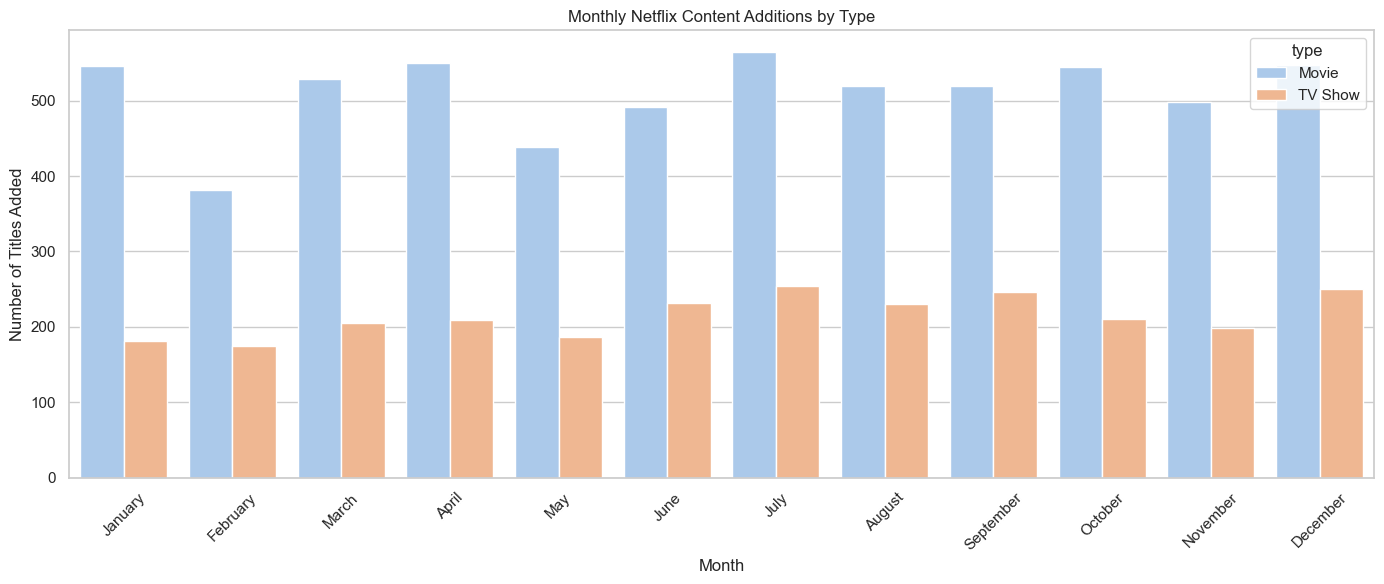

,month_added,type,count
8,January,Movie,546
9,January,TV Show,181
6,February,Movie,382
7,February,TV Show,175
15,March,TV Show,205
14,March,Movie,529
0,April,Movie,550
1,April,TV Show,209
17,May,TV Show,187
16,May,Movie,439


In [12]:
# Ensure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month
df['month_added'] = df['date_added'].dt.month_name()

# Group by month and type
monthly_counts = df.groupby(['month_added', 'type']).size().reset_index(name='count')

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts['month_added'] = pd.Categorical(monthly_counts['month_added'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values('month_added')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_counts, x='month_added', y='count', hue='type', palette='pastel')
plt.title("Monthly Netflix Content Additions by Type")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_counts.head(24)


#### What are the trends in content additions by year for each type (Movie or TV Show)?

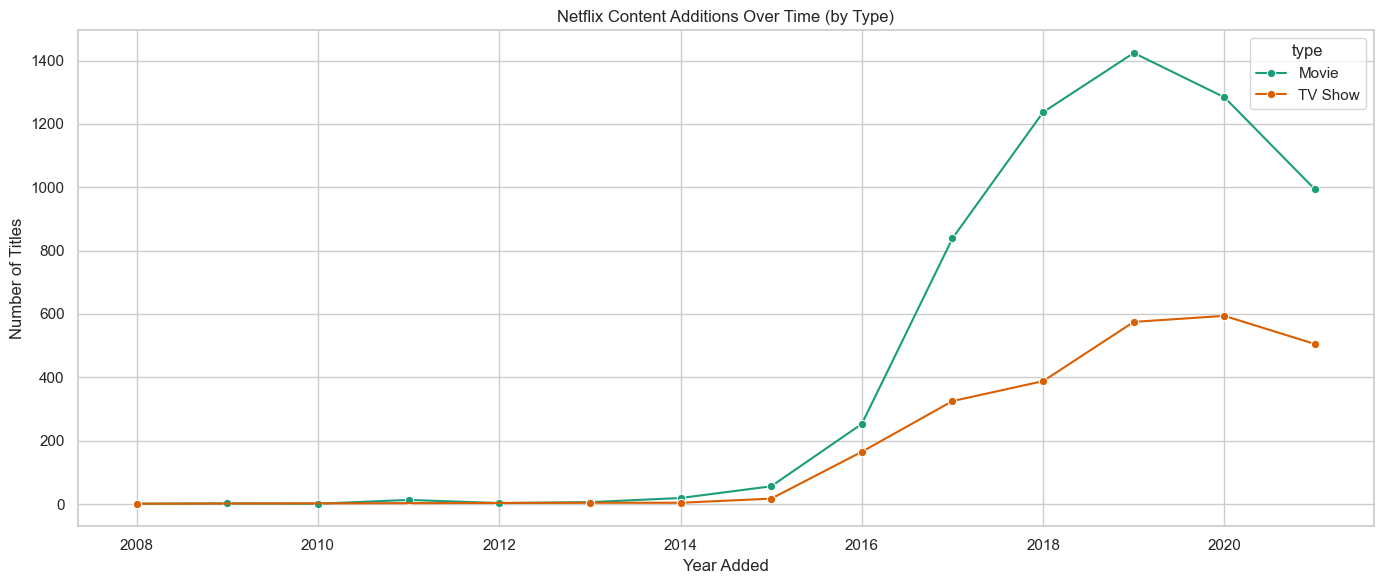

,year_added,type,count
14,2017.0,Movie,839
15,2017.0,TV Show,325
16,2018.0,Movie,1237
17,2018.0,TV Show,388
18,2019.0,Movie,1424
19,2019.0,TV Show,575
20,2020.0,Movie,1284
21,2020.0,TV Show,594
22,2021.0,Movie,993
23,2021.0,TV Show,505


In [13]:
# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Group by year and type
yearly_content = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Filter out NaN years
yearly_content = yearly_content.dropna(subset=['year_added'])

# Sort by year
yearly_content = yearly_content.sort_values('year_added')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_content, x='year_added', y='count', hue='type', marker='o', palette='Dark2')
plt.title("Netflix Content Additions Over Time (by Type)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

yearly_content.tail(10)


#### Which directors have the most content on Netflix, and what types or genres do they specialize in?

<Figure size 1200x600 with 0 Axes>

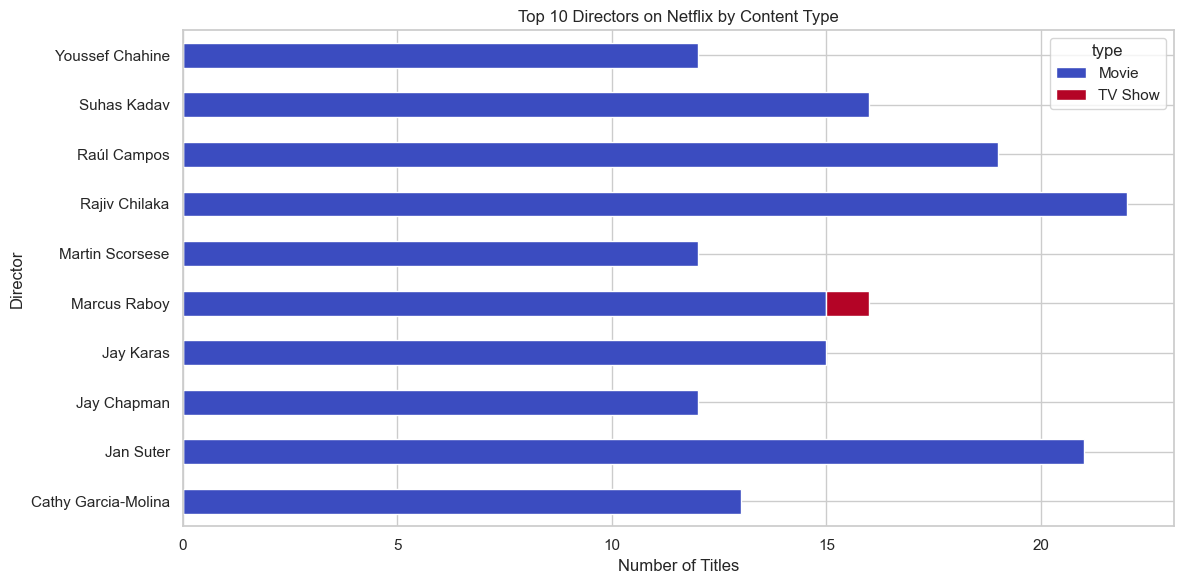

type,Movie,TV Show
director,,
Cathy Garcia-Molina,13,0
Jan Suter,21,0
Jay Chapman,12,0
Jay Karas,15,0
Marcus Raboy,15,1
Martin Scorsese,12,0
Rajiv Chilaka,22,0
Raúl Campos,19,0
Suhas Kadav,16,0


In [14]:
# Clean and explode director field
directors_df = df.dropna(subset=['director']).copy()
directors_df['director'] = directors_df['director'].str.split(', ')
directors_df = directors_df.explode('director')

# Top 10 most frequent directors
top_directors = directors_df['director'].value_counts().head(10).index.tolist()
top_director_df = directors_df[directors_df['director'].isin(top_directors)]

# Count types and genres per director
director_type_counts = top_director_df.groupby(['director', 'type']).size().unstack(fill_value=0)
director_genre_counts = top_director_df.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

# Plot type distribution
plt.figure(figsize=(12, 6))
director_type_counts.plot(kind='barh', stacked=True, colormap='coolwarm')
plt.title("Top 10 Directors on Netflix by Content Type")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

director_type_counts


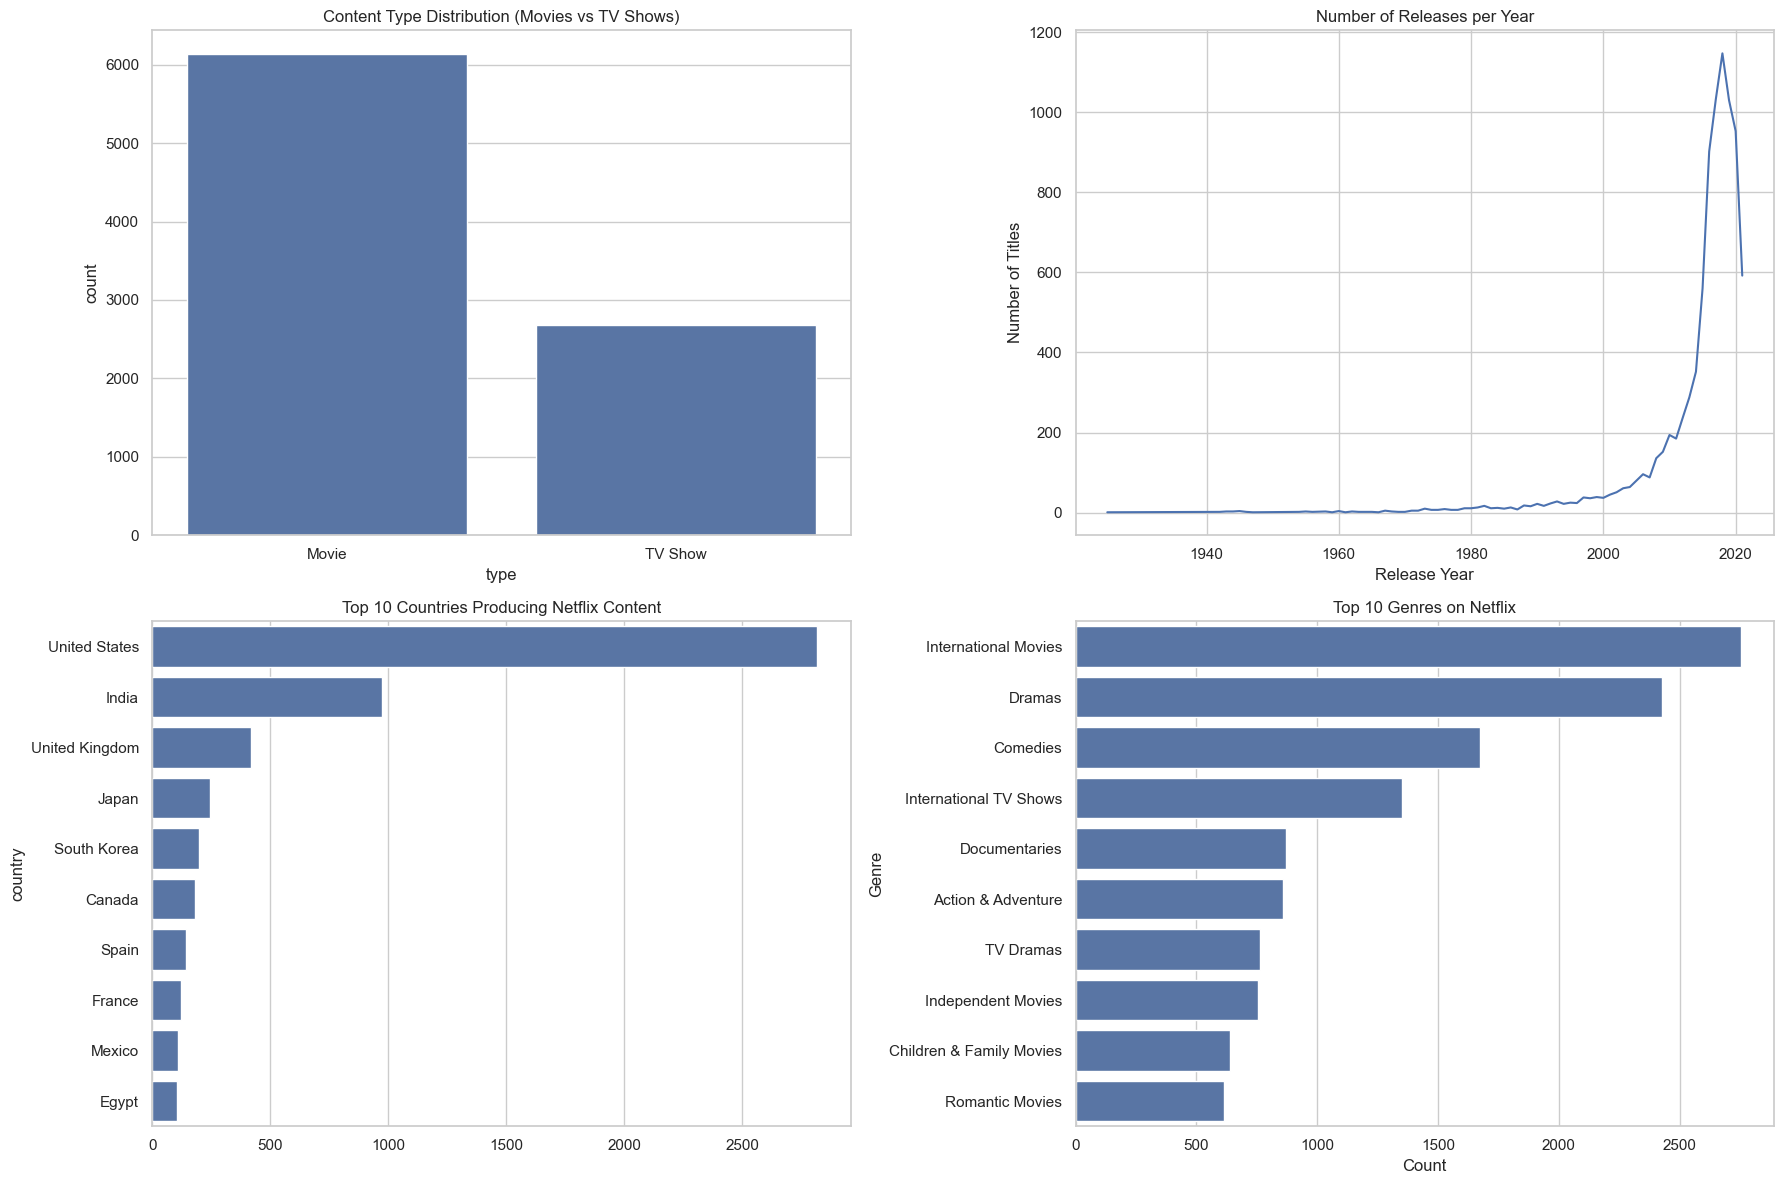

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
dtype: int64

In [3]:
# Set up visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)

# Basic distribution of content type
type_counts = df['type'].value_counts()

# Release year distribution
release_year_dist = df['release_year'].value_counts().sort_index()

# Top 10 countries
top_countries = df['country'].value_counts().head(10)

# Top 10 genres
from collections import Counter
genre_list = sum([x.split(", ") for x in df['listed_in'].dropna()], [])
top_genres = Counter(genre_list).most_common(10)

# Convert to DataFrame for easier plotting
top_genres_df = pd.DataFrame(top_genres, columns=["Genre", "Count"])

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Type distribution
sns.countplot(data=df, x='type', ax=axes[0, 0])
axes[0, 0].set_title("Content Type Distribution (Movies vs TV Shows)")

# Release year distribution
sns.lineplot(x=release_year_dist.index, y=release_year_dist.values, ax=axes[0, 1])
axes[0, 1].set_title("Number of Releases per Year")
axes[0, 1].set_xlabel("Release Year")
axes[0, 1].set_ylabel("Number of Titles")

# Top countries
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1, 0])
axes[1, 0].set_title("Top 10 Countries Producing Netflix Content")

# Top genres
sns.barplot(data=top_genres_df, x="Count", y="Genre", ax=axes[1, 1])
axes[1, 1].set_title("Top 10 Genres on Netflix")

plt.tight_layout()
plt.show()

missing_values.head(10)


# Summarizing insights from all 10 questions in a markdown cell-style string
insight_summary = """
# 📊 Netflix Dataset Business Insights Summary

## 1. **Content Type Distribution**
- **Movies (69%)** dominate the platform.
- **TV Shows (31%)** are fewer but more consistent over time.

## 2. **Country-wise Content**
- **USA** leads with over **2,500** titles.
- Followed by **India, UK, and Canada**.
- Netflix focuses content in regions with high streaming populations.

## 3. **Content Trend by Year of Release**
- Most content released between **2015–2020**.
- Surge in recent content reflects Netflix’s **aggressive content strategy**.

## 4. **Content Duration Analysis**
- TV shows often say **“1 Season”** — short-format binge content.
- Movies average around **90 mins**, ideal for quick viewing.

## 5. **TV Show Season Analysis**
- Over **70%** of TV Shows have **only 1 season**.
- Netflix focuses on **limited series** or **test launches**.

## 6. **Audience Targeting via Ratings**
- **Movies** mostly target **adults** (R, TV-MA).
- **TV Shows** serve a broader range: **kids**, **teens**, and **families**.

## 7. **Top Genres by Country**
- **“International Movies”** and **“Dramas”** dominate globally.
- Countries like India, France, Germany push internationally licensed films.

## 8. **Monthly Content Additions**
- Content spikes in **July**, **October**, and **December**.
- Aligns with **holidays** and **vacation periods** = more engagement.

## 9. **Yearly Growth in Content**
- Peak addition in **2019–2020**.
- **Movies > TV Shows**, but TV growth is steady.
- Slight drop in 2021 hints at **COVID impact**.

## 10. **Top Directors**
- Most prolific directors focus on **Movies**, especially:
  - **Indian Kids Animation**
  - **Mexican Dramas**
  - **Stand-up Comedy Specials**
- Even big names like **Martin Scorsese** contribute to Netflix’s prestige catalog.

---

🔚 **Conclusion**:  
Netflix builds a content ecosystem optimized for **global reach**, **bingeable formats**, and **year-round viewer engagement** — with a growing focus on **localized stories** and **short-form series**.
"""

